In [4]:
#### CSE 574 BCI PROJECT
import joblib
#pandas and numpy imports
import numpy as np
import pandas as pd

#Data Import for Eye Blink Data
df=pd.read_csv(r'newEyeBlink.csv')
data = df.to_numpy()
data.shape

#Data Import for Multi Physical and Imaginary Movement
df3=pd.read_excel('s11mod.xlsx', sheet_name=None)
dfconcat=pd.concat((df3[frame] for frame in df3.keys()), sort = True)
dfconcat = dfconcat.fillna(0)
data3 = dfconcat.to_numpy()


In [24]:
print(dfconcat)

       Af3.  Af4.  Af7.  Af8.  Afz.  C1..  C2..  C3..  C4..  C5..  ...  Po7.  \
0       -12   -13   -27    24    -8     4     5    26    17     2  ...    31   
1       -12     3   -16     6    -5     8    10    26    21     2  ...    36   
2       -12     9   -22    15    -3    15    16    31    30     5  ...    29   
3       -13     6   -48    50    -5    12    15    27    28     2  ...    20   
4        -8    11   -16    61     7    15    22    30    33    -1  ...    19   
5       -10    -2   -11    37     5    19    28    33    39     4  ...    11   
6        -9    -3   -34    34     4    12    25    25    34    -2  ...    32   
7         1     4   -12    24     5    17    27    36    36    11  ...    41   
8         2    -2     4    16     1    17    28    43    37    21  ...    35   
9        -2    -5   -47    36     2    17    24    42    34    17  ...    35   
10        1    17   -22    62     8    18    19    37    35     8  ...    26   
11        0    17    -1    51     8    1

In [5]:
X = np.delete(data3, 42, 1) 
Y = data3[:,42]
Y = np.where(Y=='right Fist', 'Right_Fist', Y) 
Y = np.where(Y=='left Fist', 'Left_Fist', Y)
data_classes = np.unique(Y)
X = X.astype(int)

In [6]:
dfconcat = dfconcat.fillna(0)
data3 = dfconcat.to_numpy()
X = np.delete(data3, 42, 1) 
Y = data3[:,42]
Y = np.where(Y=='right Fist', 'Right_Fist', Y) 
Y = np.where(Y=='left Fist', 'Left_Fist', Y)
data_classes = np.unique(Y)
X = X.astype(int)

Y = np.where(Y=='Both_Fists',0, Y)
Y = np.where(Y=='IMGINE_Both_Fists',1, Y)
Y = np.where(Y=='IMGINE_Left_Fist', 2, Y)
Y = np.where(Y=='IMGINE_Right_Fist', 3, Y)
Y = np.where(Y=='Left_Fist', 4, Y)
Y = np.where(Y=='Rest_Eyes_Closed', 5, Y)
Y = np.where(Y=='Rest_Eyes_Open', 6, Y)
Y = np.where(Y=='Right_Fist', 7, Y)
Y = np.where(Y=='rest', 8, Y)
Y = Y.astype(int)
Y = np.array([Y]).transpose()

XYstack = np.hstack((X,Y))
display(XYstack)
XY = XYstack[XYstack[:, -1] != 8]
XY

array([[-12, -13, -27, ...,  21,  21,   6],
       [-12,   3, -16, ..., -19,  29,   6],
       [-12,   9, -22, ...,  27,  35,   6],
       ...,
       [  3,  26,   8, ..., -10,  29,   1],
       [ -8,  17,  -6, ..., -19,  26,   1],
       [-17,   8,  -9, ..., -23,  27,   1]])

array([[-12, -13, -27, ...,  21,  21,   6],
       [-12,   3, -16, ..., -19,  29,   6],
       [-12,   9, -22, ...,  27,  35,   6],
       ...,
       [  3,  26,   8, ..., -10,  29,   1],
       [ -8,  17,  -6, ..., -19,  26,   1],
       [-17,   8,  -9, ..., -23,  27,   1]])

In [7]:
Mapping = dict(zip(data_classes[0:8], range(0,8)))
display(Mapping)

{'Both_Fists': 0,
 'IMGINE_Both_Fists': 1,
 'IMGINE_Left_Fist': 2,
 'IMGINE_Right_Fist': 3,
 'Left_Fist': 4,
 'Rest_Eyes_Closed': 5,
 'Rest_Eyes_Open': 6,
 'Right_Fist': 7}

In [8]:
##CREATE RANDOM SAMPLING WITHOUT REPLACEMENT OF DATA
#Can change sample size if you prefer
idx = np.random.choice(XY.shape[0]-1, 50000, replace=False)
XYsample = XY[idx]    

In [19]:
###DATA SPLIT AND ACCURACY MEASURE FOR KNN MODEL

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import metrics

X_train, X_test, Y_train, Y_test = train_test_split(XYsample[:,0:65], XYsample[:,65], test_size=0.2)
print(X_train.shape,
Y_train.shape)
#neigh = KNeighborsClassifier(n_neighbors = 5)
#neigh.fit(X_train,Y_train)
#y_pred3 = neigh.predict(X_test)
# Making the prediction
#display('KNN Classifier Score: ', metrics.accuracy_score(Y_test,y_pred3))

(40000, 65) (40000,)


In [27]:
#print(df3.columns)
tttraining=np.append(X_train,Y_train.reshape(-1,1),axis=1)
tttesting=np.append(X_test,Y_test.reshape(-1,1),axis=1)
TRA = pd.DataFrame(data=tttraining, columns=np.array(dfconcat.columns))
TE = pd.DataFrame(data=tttesting, columns=np.array(dfconcat.columns))
TRA.to_csv('train.csv', index=True)
TE.to_csv('test.csv', index=True)

In [12]:
#GridSearch on KNN hyperparameter

#define parameter range
param_grid3 = {'n_neighbors' : [1, 3, 5, 7, 10, 12, 15, 16]}
grid3 = GridSearchCV(KNeighborsClassifier(), param_grid3, refit = True, verbose = 3, cv = 4) 
#fit the model for grid search 
grid3.fit(X_train,Y_train)
# grid predictions
grid_prediction3 = grid3.predict(X_test)

###GRID SEARCH OPTIMIZATION
scores = grid3.cv_results_
mean_scores1 = scores.get('split0_test_score')
mean_scores2 = scores.get('split1_test_score')
mean_scores3 = scores.get('split2_test_score')
mean_scores4 = scores.get('split3_test_score')
params = param_grid3.get('n_neighbors')
_, KNN_plot = plt.subplots(1,1)
KNN_plot.plot(params, mean_scores1, '-o', label = 'Split 1')
KNN_plot.plot(params, mean_scores2, '-x', label = 'Split 2')
KNN_plot.plot(params, mean_scores3, '-v', label = 'Split 3')
KNN_plot.plot(params, mean_scores4, '-^', label = 'Split 4')

KNN_plot.set_title("Grid Search Scores: K-Nearest Neighbors", fontsize=16, fontweight='bold')
KNN_plot.set_xlabel('K value', fontsize=14)
KNN_plot.set_ylabel('Cross Validation Average Score', fontsize=14)
KNN_plot.legend(loc="best", fontsize=14)
KNN_plot.grid('on')

Fitting 4 folds for each of 8 candidates, totalling 32 fits
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... n_neighbors=1, score=0.9812056383085075, total=  20.0s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.8s remaining:    0.0s


[CV] .......... n_neighbors=1, score=0.9797020297970203, total=  16.5s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   40.3s remaining:    0.0s


[CV] ...................... n_neighbors=1, score=0.9818, total=  17.1s
[CV] n_neighbors=1 ...................................................
[CV] .......... n_neighbors=1, score=0.9819927971188476, total=  16.5s
[CV] n_neighbors=3 ...................................................
[CV] .......... n_neighbors=3, score=0.9649105268419474, total=  24.5s
[CV] n_neighbors=3 ...................................................
[CV] .......... n_neighbors=3, score=0.9651034896510349, total=  24.6s
[CV] n_neighbors=3 ...................................................
[CV] ...................... n_neighbors=3, score=0.9662, total=  24.9s
[CV] n_neighbors=3 ...................................................
[CV] .......... n_neighbors=3, score=0.9625850340136054, total=  30.7s
[CV] n_neighbors=5 ...................................................
[CV] .......... n_neighbors=5, score=0.9532140357892632, total=  28.1s
[CV] n_neighbors=5 ...................................................
[CV] .

KeyboardInterrupt: 

In [ ]:
#####PLOT FOR PREDICTION

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors

labels = ['Move Both Fists','Imagine Moving Both Fists','Imagine Moving Left Fist','Imagine Moving Right Fist','Left Fist','Rest Eyes Closed','Rest Eyes Open','Right Fist']

neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(X_train)
neigh.fit(X_train,Y_train)
neighbors = 5
samp = np.array([X_test[53,]])
idx = neigh.kneighbors(samp, neighbors*3, return_distance = False)
idx = idx.flatten()
neighborplot = XYsample[idx,:]
predicted_label = labels[np.argmax(np.bincount(neighborplot[0:neighbors,-1]))]
display(predicted_label)
display(neighborplot[:,-1])
y = [0,1,2,3,4,5,6,7]

colors = ['#FF3333','#FF9933','#FFFF33','#80FF00','#00FFFF','#0080FF','#0000FF','#7F00FF']
colors2 = ['#FFCCCC', '#FFE5CC', '#FFFFCC', '#E5FFCC', '#CCFFFF', '#CCE5FF', '#CCCCFF','#FFCCFF']

fig, ax = plt.subplots()
plt.rcParams['axes.facecolor'] = 'white'


for i in range(samp.shape[0]):
    for j in range(neighbors):
        xx = np.array([neighborplot[i*neighbors+j,0],samp[i,0]]) #neighborplot[i*neighbors+j,0]
        yy = np.array([neighborplot[i*neighbors+j,1],samp[i,1]]) #[neighborplot[i*neighbors+j,1]
        ax.plot(xx,yy, 'r--',color = 'gray')
for i in range(8):
    ax.scatter(neighborplot[neighborplot[:,-1] == i,0], neighborplot[neighborplot[:,-1] == i,1], label = labels[i], marker='o', s= 100, color=colors[i], edgecolor = 'gray')
for i in range(samp.shape[0]):
    ax.scatter(samp[i,0], samp[i,1], marker='*', s= 750, color='black') 

ax.legend()
plt.title('Prediction')
plt.show()

In [ ]:
###CONFUSION MATRIX FOR MULTICLASS KNN

from sklearn.metrics import confusion_matrix
KNN_CM = confusion_matrix(Y_test, y_pred3)
plt.matshow(KNN_CM, cmap=plt.cm.get_cmap('Purples', 15));
plt.colorbar()
plt.show();

In [ ]:
####PLOT OF ALL SAMPLE DATA AND LABELS (50,000 POINTS)

import matplotlib

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
h = 0.2
X = X_train[:, :2]
y = Y_train

# Create color maps
#    cmap_light = ListedColormap([ '#FFCCCC', '#FFE5CC', '#FFFFCC', '#E5FFCC', '#CCFFFF', '#CCE5FF', '#CCCCFF','#FFCCFF'])
cmap_bold = ListedColormap(['#FF3333','#FF9933','#FFFF33','#80FF00','#00FFFF','#0080FF','#0000FF','#7F00FF','#FF00FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(5, weights='distance')
clf.fit(X, y)

# calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(facecolor=(1, 1, 1))
#    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("8-Class classification (k = %i)" % (neighbors)) #labels, number of neightbors
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import metrics

X_train, X_test, Y_train, Y_test = train_test_split(data[:,0:14], data[:,14], test_size=0.2)

In [ ]:
## USING SCALED DATA
X = np.vstack((X_train, X_test))
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train = X[0:X_train.shape[0],:]
X_test = X[X_train.shape[0]:X.shape[0], :]
display(data.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

#SVM Classifier 
svclass = SVC(kernel='linear', gamma = 'auto', C = 1000)
svclass.fit(X_train,Y_train)
#making the prediction 
y_pred1 = svclass.predict(X_test)
display('SVM Classifier Score: ', metrics.accuracy_score(Y_test,y_pred1))

#Decision Tree Classifier
giniImp = DecisionTreeClassifier(criterion = "gini", random_state=100)
giniImp.fit(X_train,Y_train)
# make prediction 
y_pred2 = giniImp.predict(X_test)
display('Decision Tree Classifier Score: ', metrics.accuracy_score(Y_test,y_pred2))

#KNN Classifier 
neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(X_train,Y_train)
y_pred3 = neigh.predict(X_test)
display('KNN Classifier Score: ', metrics.accuracy_score(Y_test,y_pred3))

#Logisitic Regression Classifier
lrmodel = LogisticRegression(multi_class = 'multinomial', solver = 'sag', C = 1000)
lrmodel.fit(X_train,Y_train)
# Making the prediction
y_pred4 = lrmodel.predict(X_test)
display('Logistic Regression Classifier Score: ', metrics.accuracy_score(Y_test,y_pred4))

In [ ]:
##USING ORIGINAL DATA
X_train, X_test, Y_train, Y_test = train_test_split(data[:,0:14], data[:,14], test_size=0.2)

#SVM Classifier 
svclass = SVC(kernel='linear', gamma = 'auto', C = 1000)
svclass.fit(X_train,Y_train)
# Making the prediction
y_pred1 = svclass.predict(X_test)
display('SVM Classifier Score: ', metrics.accuracy_score(Y_test,y_pred1))

#Decision Tree Classifier
giniImp = DecisionTreeClassifier(criterion = "gini", random_state=100)
giniImp.fit(X_train,Y_train)
# Making the prediction
y_pred2 = giniImp.predict(X_test)
display('Decision Tree Classifier Score: ', metrics.accuracy_score(Y_test,y_pred2))

#KNN Classifier 
neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(X_train,Y_train)
y_pred3 = neigh.predict(X_test)
# Making the prediction
display('KNN Classifier Score: ', metrics.accuracy_score(Y_test,y_pred3))

#Logisitic Regression Classifier
lrmodel = LogisticRegression(multi_class = 'multinomial', solver = 'sag', C = 1000)
lrmodel.fit(X_train,Y_train)
# Making the prediction
y_pred4 = lrmodel.predict(X_test)
display('Logistic Regression Classifier Score: ', metrics.accuracy_score(Y_test,y_pred4))

In [ ]:
#***************************************************Grid Search****************************************************
#GridSearch on SVM hyperparameter  
#define parameter range
param_grid1 = {'C' : [1, 5, 10, 25, 50, 75, 100, 250, 500, 1000]}
               #param_grid1 = [{'C' : [1, 5, 10, 25, 50, 75, 100, 250, 500, 1000], 'kernel': ['linear']},
               #{'C' : [1, 5, 10, 25, 50, 75, 100, 250, 500, 1000], 'kernel': ['poly']},
               #{'C' : [1, 5, 10, 25, 50, 75, 100, 250, 500, 1000], 'kernel': ['rbf']},
               #{'C' : [1, 5, 10, 25, 50, 75, 100, 250, 500, 1000], 'kernel': ['sigmoid']}]
grid1 = GridSearchCV(svclass, param_grid1, refit = True, verbose = 3, cv = 4) 
#fit the model for grid search 
grid1.fit(X_train,Y_train)
# grid predictions
grid_prediction1 = grid1.predict(X_test)

#GridSearch on DecisionTree hyperparameter 
#define parameter range
param_grid2 = {'max_depth' : [4, 8, 10, 12, 16, 24, 30, 34]}
grid2 = GridSearchCV(giniImp, param_grid2, refit = True, verbose = 3, cv = 4) 
#fit the model for grid search 
grid2.fit(X_train,Y_train)
# grid predictions
grid_prediction2 = grid2.predict(X_test)

#GridSearch on KNN hyperparameter  
#define parameter range
param_grid3 = {'n_neighbors' : [1, 3, 5, 7, 10, 12, 15, 16]}
grid3 = GridSearchCV(KNeighborsClassifier(), param_grid3, refit = True, verbose = 3, cv = 4) 
#fit the model for grid search 
grid3.fit(X_train,Y_train)
# grid predictions
grid_prediction3 = grid3.predict(X_test)

In [ ]:
#****************************************Grid Search Visualization*****************************************
#1. SVM
scores = grid1.cv_results_
mean_scores1 = scores.get('split0_test_score')
mean_scores2 = scores.get('split1_test_score')
mean_scores3 = scores.get('split2_test_score')
mean_scores4 = scores.get('split3_test_score')
params = param_grid1.get('C')
_, SVM_plot = plt.subplots(1,1)
SVM_plot.plot(params, mean_scores1, '-o', label = 'Split 1')
SVM_plot.plot(params, mean_scores2, '-x', label = 'Split 2')
SVM_plot.plot(params, mean_scores3, '-v', label = 'Split 3')
SVM_plot.plot(params, mean_scores4, '-^', label = 'Split 4')

SVM_plot.set_title("Grid Search Scores: Support Vector Machines", fontsize=16, fontweight='bold')
SVM_plot.set_xlabel('C value', fontsize=14)
SVM_plot.set_ylabel('Cross Validation Average Score', fontsize=14)
SVM_plot.legend(loc="best", fontsize=14)
SVM_plot.grid('on')

#2. DT
scores = grid2.cv_results_
mean_scores1 = scores.get('split0_test_score')
mean_scores2 = scores.get('split1_test_score')
mean_scores3 = scores.get('split2_test_score')
mean_scores4 = scores.get('split3_test_score')
params = param_grid2.get('max_depth')
_, DT_plot = plt.subplots(1,1)
DT_plot.plot(params, mean_scores1, '-o', label = 'Split 1')
DT_plot.plot(params, mean_scores2, '-x', label = 'Split 2')
DT_plot.plot(params, mean_scores3, '-v', label = 'Split 3')
DT_plot.plot(params, mean_scores4, '-^', label = 'Split 4')

DT_plot.set_title("Grid Search Scores: Decision Trees", fontsize=16, fontweight='bold')
DT_plot.set_xlabel('Max Depth', fontsize=14)
DT_plot.set_ylabel('Cross Validation Average Score', fontsize=14)
DT_plot.legend(loc="best", fontsize=14)
DT_plot.grid('on')

#3. KNN
scores = grid3.cv_results_
mean_scores1 = scores.get('split0_test_score')
mean_scores2 = scores.get('split1_test_score')
mean_scores3 = scores.get('split2_test_score')
mean_scores4 = scores.get('split3_test_score')
params = param_grid3.get('n_neighbors')
_, KNN_plot = plt.subplots(1,1)
KNN_plot.plot(params, mean_scores1, '-o', label = 'Split 1')
KNN_plot.plot(params, mean_scores2, '-x', label = 'Split 2')
KNN_plot.plot(params, mean_scores3, '-v', label = 'Split 3')
KNN_plot.plot(params, mean_scores4, '-^', label = 'Split 4')

KNN_plot.set_title("Grid Search Scores: K-Nearest Neighbors", fontsize=16, fontweight='bold')
KNN_plot.set_xlabel('K value', fontsize=14)
KNN_plot.set_ylabel('Cross Validation Average Score', fontsize=14)
KNN_plot.legend(loc="best", fontsize=14)
KNN_plot.grid('on')

In [ ]:
##Confusion Matrix Definition
def ConfusionMatrix(y_true,y_pred):
    minlabel = np.min(y_true)
    y_true = y_true - np.repeat(minlabel, y_true.shape[0])
    y_true = y_true.astype(int)
    y_pred = y_pred - np.repeat(minlabel, y_true.shape[0])
    y_pred = y_pred.astype(int)
    numClass = np.unique(y_true).shape[0]
    confusion = np.zeros((numClass,numClass))
    for i, j in zip(y_true, y_pred):
        confusion[i][j] += 1    
    return confusion

In [ ]:
#******************************************Confusion Matrix Visualization*****************************************
####### IMPORTANT: CONFUSION MATRICES REQUIRE Y_TESTS TO BE ADDED#######
SVM_CM = ConfusionMatrix(Y_test, y_pred1)
plt.matshow(SVM_CM, cmap=plt.cm.get_cmap('Blues', 10));
plt.colorbar()
plt.show();

DT_CM = ConfusionMatrix(Y_test, y_pred2)
plt.matshow(DT_CM, cmap=plt.cm.get_cmap('Reds', 10));
plt.colorbar()
plt.show();

KNN_CM = ConfusionMatrix(Y_test, y_pred3)
plt.matshow(KNN_CM, cmap=plt.cm.get_cmap('Purples', 10));
plt.colorbar()
plt.show();

LR_CM = ConfusionMatrix(Y_test, y_pred4)
plt.matshow(LR_CM, cmap=plt.cm.get_cmap('Greens', 10));
plt.colorbar()
plt.show();

In [ ]:
import matplotlib

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
h = 0.2
X = X_train[:, :2]
y = Y_train

# Create color maps
cmap_light = ListedColormap([ '#FFCCCC', '#FFE5CC', '#FFFFCC', '#E5FFCC', '#CCFFFF', '#CCE5FF', '#CCCCFF','#FFCCFF'])
cmap_bold = ListedColormap(['#FF3333','#FF9933','#FFFF33','#80FF00','#00FFFF','#0080FF','#0000FF','#7F00FF','#FF00FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(5, weights='distance')
clf.fit(X, y)

# calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(facecolor=(1, 1, 1))
#    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)" % (neighbors)) #labels, number of neightbors
plt.show()

'Move Both Fists'

array([4, 0, 1, 4, 0, 4, 7, 7, 4, 1, 7, 7, 7, 7, 0])

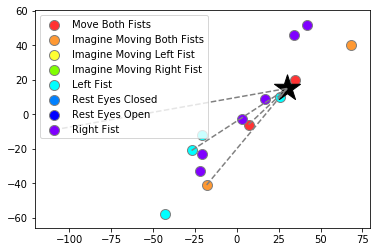

In [13]:
#####PLOT FOR PREDICTION

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors

labels = ['Move Both Fists','Imagine Moving Both Fists','Imagine Moving Left Fist','Imagine Moving Right Fist','Left Fist','Rest Eyes Closed','Rest Eyes Open','Right Fist']

neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(X_train)
neigh.fit(X_train,Y_train)
neighbors = 5
samp = np.array([X_test[53,]])
idx = neigh.kneighbors(samp, neighbors*3, return_distance = False)
idx = idx.flatten()
neighborplot = XYsample[idx,:]
predicted_label = labels[np.argmax(np.bincount(neighborplot[0:neighbors,-1]))]
display(predicted_label)
display(neighborplot[:,-1])
y = [0,1,2,3,4,5,6,7]

colors = ['#FF3333','#FF9933','#FFFF33','#80FF00','#00FFFF','#0080FF','#0000FF','#7F00FF']
colors2 = ['#FFCCCC', '#FFE5CC', '#FFFFCC', '#E5FFCC', '#CCFFFF', '#CCE5FF', '#CCCCFF','#FFCCFF']

fig, ax = plt.subplots()
plt.rcParams['axes.facecolor'] = 'white'


for i in range(samp.shape[0]):
    for j in range(neighbors):
        xx = np.array([neighborplot[i*neighbors+j,0],samp[i,0]]) #neighborplot[i*neighbors+j,0]
        yy = np.array([neighborplot[i*neighbors+j,1],samp[i,1]]) #[neighborplot[i*neighbors+j,1]
        ax.plot(xx,yy, 'r--',color = 'gray')
for i in range(8):
    ax.scatter(neighborplot[neighborplot[:,-1] == i,0], neighborplot[neighborplot[:,-1] == i,1], label = labels[i], marker='o', s= 100, color=colors[i], edgecolor = 'gray')
for i in range(samp.shape[0]):
    ax.scatter(samp[i,0], samp[i,1], marker='*', s= 750, color='black') 

ax.legend()
plt.show()